In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

def read_data(path):
    dat=pd.read_csv(path)
    #senorname=pd.Series(dat.keys()[2:-1])
    senorname=dat.keys()[2:-1] 
    return dat, senorname

data,senorname=read_data('pump_sensor.csv')
def explore(data):
    print('Data overview: ')
    print(data.shape); print()
    print('keys :') ; print(data.keys()); print()
    print( 'status options: ');  print( data['machine_status'].unique()); print()
    print (data['machine_status'].value_counts()); print()
    #print((data.isna().sum())[2:-1]); print()
    info=data.describe()
    variance=pd.DataFrame({'var':data.var()})
    info=pd.concat([info,variance.transpose()])
    return data.head(), data.tail(), info

head,tail,info=explore(data)
print(info)
tail

Data overview: 
(220320, 55)

keys :
Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

status options: 
['NORMAL' 'BROKEN' 'RECOVERING']

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype

/var/folders/tz/z9b0lkh96gq52x97rfvwrds40000gn/T/ipykernel_92383/2820121049.py:25: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance=pd.DataFrame({'var':data.var()})


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,...,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


In [3]:


def preprocess_labels(data):
    from sklearn import preprocessing

    #Label Mapping
    le = preprocessing.LabelEncoder()
    le.fit(data)
    encoded_y=le.transform(data)
    #Get the Label map
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    return pd.DataFrame(encoded_y,columns=['target'])

encoded_y=preprocess_labels(data['machine_status'])


{'BROKEN': 0, 'NORMAL': 1, 'RECOVERING': 2}


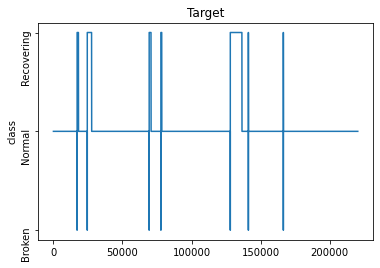

In [4]:

x=np.linspace(1,len(encoded_y),len(encoded_y)) # create x-axis (could also be the converted timestamp column)
plt.plot(x,encoded_y) 
plt.ylabel('class')
plt.title('Target')
labels = ['Normal','Broken','Recovering'] # Give the y-axis the Class lables we found earlier
plt.yticks([1,0,2], labels, rotation='vertical') # Set the y-ticks to three to only show the classnames
plt.show()   

In [5]:
def plotting_stuff(data,plottype,Title, saving=False):
    #plt.plot(dat.loc[:,['sensor_01']])
    fig=plt.figure()
    data.plot(kind=plottype)
    #plt.stem(data)
    plt.title(Title)
    #plt.xticks(rotation=45)
    if saving==True:
        plt.savefig(Title+'.png', format='png', dpi=300, transparent=True)  

def plot_Y(data, col='target', saving=False, name='target'):
    import numpy as np
    y=data[col]; x=np.linspace(1,len(y),len(y))
    plt.plot(x,y)
    plt.ylabel('class')
    plt.title('Target')
    labels = ['Normal','Broken','Recovering']
    if col=='target':
        plt.yticks([1,0,2], labels, rotation='vertical')
    elif col=='machine_status':
        plt.yticks([0,1,2], labels, rotation='vertical')
    if saving==True:
        plt.savefig(name+'.png', format='png', dpi=300, transparent=True)
    plt.show()   

def plotting_together(Values): 
    fig=plt.Figure()
    Values.plot(subplots = True, sharex = True, figsize=(30,55))    
    plt.savefig('Overview.png', format='png', dpi=300, transparent=True)
    plt.show    

def plotting_merged(data, encoded_y, senorname, saving=False):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaled_dat = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    for i in senorname:
        fig=plt.figure()
        ax=scaled_dat[i].plot.line()
        encoded_y.plot(ax=ax)
        plt.title('together_' + str(i) )
        plt.legend(['sensor','target'])
        if saving==True:
            fig.savefig('Sensor_'+str(i)+'.png', format='png', dpi=300, transparent=True)
        plt.show() 


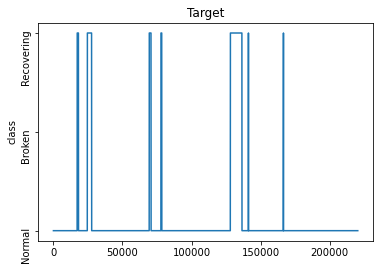

In [6]:
info_std=info.loc[['std']][senorname]
info_var=info.loc[['var']][senorname]

plot_Y(data,col='machine_status',saving=True,name='Classes')
# plotting_stuff((data.isna().sum())[2:-1],'bar','Raw-NaN',saving=False) # show which sensors have how many NANs
# plotting_stuff(info_std.transpose(),'bar','std',saving=True)# Show std
# plotting_stuff(info_var.transpose(),'bar','var',saving=True)# Show std

In [7]:


def manipulate_X(data, printplot=False):
    # data=data.drop(labels=['sensor_15'],axis=1)#bad sensors
    # data=data.drop(labels=['sensor_00'],axis=1)#bad sensors

    data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000] # repair sensor 51
    # data=data.drop(labels=['sensor_50'],axis=1)#bad sensors

    # data=data.drop(labels=['sensor_00','sensor_15','sensor_37','sensor_50'],axis=1)#bad sensors
    # data=data.drop(labels=['sensor_06','sensor_07','sensor_08','sensor_09'],axis=1)# low variance NaNs
    data=data.fillna(method="pad",limit=30)
    data=data.dropna()
    if printplot==True:
        print((data.isna().sum()))
        plotting_stuff((data.isna().sum()[2:-1]),'bar','fill_nan',saving=True)
        
    return data   


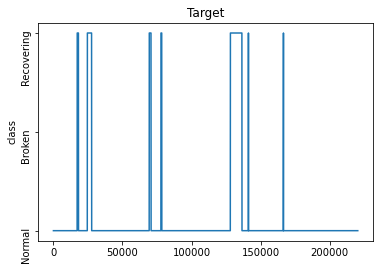

In [8]:
plot_Y(data,col='machine_status',saving=True,name='Classes')


In [9]:
Values=pd.concat([data[senorname],encoded_y],axis=1)#.reindex(dat.index)
#plotting_merged(data[senorname],encoded_y, senorname,saving=True)# plot each singal with target
# plotting_together(Values) #plot all signals together with target

In [10]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, namen = list(),list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        namen +=[('sensor%d(t-%d)' %(j-1, i)) for j in range (n_vars)]
        #forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            namen +=[('sensor%d(t)' %(j+1)) for j in range (n_vars)]
        else:
            namen +=[('sensor%d(t+%d)' %(j+1, i)) for j in range (n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns=namen
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [11]:
def splitting_and_shape_data(data_x,data_y):    
    train_X=data_x[0:120000].values
    train_Y=data_y[0:120000].values
    
    val_X=data_x[140000::].values
    val_Y=data_y[140000::].values
    
    test_X=data_x[120000:140000].values
    test_Y=data_y[120000:140000].values
      
    train_X.astype('float32')
    val_X.astype('float32')
    test_X.astype('float32')
    
    return train_X,train_Y,val_X,val_Y,test_X,test_Y,  

In [18]:
Future=10 # How many steps to look into the future

#LOAD DATA    
data,sensorname=read_data('pump_sensor.csv')

#MAP TARGETS TO VALUE    
encoded_y=preprocess_labels(data['machine_status'])
Values=pd.concat([data[sensorname],encoded_y],axis=1)#.reindex(data.index)

#PREPROCESS DATA   
Values=manipulate_X(Values, printplot=False); sensorname=Values.keys()[:-1] 

#CREATE WINDOWED DATA
Future=1

data_win=series_to_supervised(Values, n_in=Future, n_out=1)
to_remove_list =['sensor'+str(n)+'(t)' for n in range(1,len(Values.columns)+1)] #now remove all non shifted elements again. so we retreive elements and shifted target
#to_remove_list_2 =['sensor'+str(n)+'(t-'+ str(i)+')' for n in range(1,len(data_scaled.columns)+1) for i in range(1,Future)] #now remove all non shifted elements again. so we retreive elements and shifted target
#to_remove_list=to_remove_list_1+to_remove_list_2
data_y=data_win.iloc[:,-1] #Get the target data out before removing unwanted data
data_x=data_win.drop(to_remove_list, axis=1) #remove sensors(t)
data_x.drop(data_x.columns[len(data_x.columns)-1], axis=1, inplace=True)# remove target(t-n)
data_y.shape

{'BROKEN': 0, 'NORMAL': 1, 'RECOVERING': 2}


/var/folders/tz/z9b0lkh96gq52x97rfvwrds40000gn/T/ipykernel_92383/1097711569.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sensor_51'][110000:140000]=data['sensor_50'][110000:140000] # repair sensor 51


(0,)

In [13]:
   #one hot encode the targets for class prediction/ not for signal prediction
def one_hot(train_Y,val_Y,test_Y):    
    from sklearn.preprocessing import OneHotEncoder
    
    oneHot=OneHotEncoder()
    oneHot.fit(train_Y.reshape(-1,1))
    
    train_Y_Hot=oneHot.transform(train_Y.reshape(-1,1)).toarray()
    val_Y_Hot  =oneHot.transform(val_Y.reshape(-1,1)).toarray()
    test_Y_Hot =oneHot.transform(test_Y.reshape(-1,1)).toarray()
    
    return train_Y_Hot,val_Y_Hot,test_Y_Hot

In [15]:
#CREATE TRAIN/VAL/TEST SETS
    # We split the data that all sets have at least one error in. But shuffeling is not allowed. Therfore, we do it manually

train_X,train_Y,val_X,val_Y,test_X,test_Y=splitting_and_shape_data(data_x,data_y)
train_Y_Hot,val_Y_Hot,test_Y_Hot=one_hot(train_Y,val_Y,test_Y)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.